<a href="https://colab.research.google.com/github/StephenSheng1101/DMAsgmnt/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [50]:
df = pd.read_csv("dataset.csv")

In [51]:
def load_transport_data():
    tarball_path = Path("/content/dataset.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        with tarfile.open(tarball_path) as transport_tarball:
            transport_tarball.extractall(path="datasets")
    return pd.read_csv(Path("/content/dataset.csv"))

transport = load_transport_data()
transport.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2


In [52]:

transport.describe()
transport.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1048575 non-null  object 
 1   travel_fee      1048575 non-null  float64
 2   departure_time  1048575 non-null  object 
 3   departure_long  1048575 non-null  float64
 4   departure_lat   1048575 non-null  float64
 5   arrival_long    1048561 non-null  float64
 6   arrival_lat     1048561 non-null  float64
 7   occupancy       1048575 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


In [53]:
transport.isnull().sum()

ID                 0
travel_fee         0
departure_time     0
departure_long     0
departure_lat      0
arrival_long      14
arrival_lat       14
occupancy          0
dtype: int64

In [54]:
#handling missing value
transport["departure_long"].fillna(transport["departure_long"].mean(), inplace=True)
transport["departure_lat"].fillna(transport["departure_lat"].mean(), inplace=True)
transport["occupancy"].fillna(transport["occupancy"].mode()[0], inplace=True)
transport.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
transport.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
transport.isnull().sum()

travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
dtype: int64

In [55]:
transport.head()

,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2


In [56]:
# Convert departure_time to datetime
transport['departure_time'] = pd.to_datetime(transport['departure_time'])

# Extract features from departure_time
transport['hour_of_day'] = transport['departure_time'].dt.hour
transport['day_of_week'] = transport['departure_time'].dt.dayofweek

In [57]:
from sklearn.preprocessing import StandardScaler

data_numeric = transport.drop(columns=['departure_time'])

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)
scaled_data

array([[-0.51689243, -0.13915281,  0.1130228 , ..., -0.51598183,
         0.83853843, -1.04202928],
       [-0.65548032, -0.13993849,  0.11072036, ..., -0.51598183,
        -2.0650258 ,  1.00258523],
       [ 0.8227905 , -0.13787815,  0.11666088, ..., -0.51598183,
        -1.60656829,  1.51373886],
       ...,
       [-0.10112876, -0.13598584,  0.11944389, ..., -0.51598183,
        -0.99529161, -1.5531829 ],
       [-0.37830454, -0.13907411,  0.11217305, ..., -0.51598183,
         1.29699594, -1.5531829 ],
       [ 0.68420261, -0.13931619,  0.113109  , ..., -0.51598183,
         1.14417677, -0.53087565]])

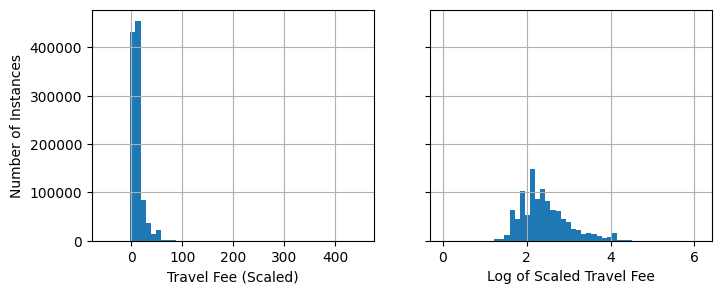

In [58]:
# Plot histogram of a scaled feature
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
transport["travel_fee"].hist(ax=axs[0], bins=50)
transport["travel_fee"].apply(np.log1p).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Travel Fee (Scaled)")
axs[1].set_xlabel("Log of Scaled Travel Fee")
axs[0].set_ylabel("Number of Instances")
plt.show()

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = ['travel_fee', 'departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'hour_of_day', 'day_of_week','occupancy']

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])



In [60]:
transport_prepared = preprocessing.fit_transform(transport)
transport_prepared


array([[-0.51689243, -0.13915281,  0.1130228 , ...,  0.83853843,
        -1.04202928, -0.51598183],
       [-0.65548032, -0.13993849,  0.11072036, ..., -2.0650258 ,
         1.00258523, -0.51598183],
       [ 0.8227905 , -0.13787815,  0.11666088, ..., -1.60656829,
         1.51373886, -0.51598183],
       ...,
       [-0.10112876, -0.13598584,  0.11944389, ..., -0.99529161,
        -1.5531829 , -0.51598183],
       [-0.37830454, -0.13907411,  0.11217305, ...,  1.29699594,
        -1.5531829 , -0.51598183],
       [ 0.68420261, -0.13931619,  0.113109  , ...,  1.14417677,
        -0.53087565, -0.51598183]])

In [61]:
preprocessing.get_feature_names_out()

array(['num__travel_fee', 'num__departure_long', 'num__departure_lat',
       'num__arrival_long', 'num__arrival_lat', 'num__hour_of_day',
       'num__day_of_week', 'num__occupancy'], dtype=object)